# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

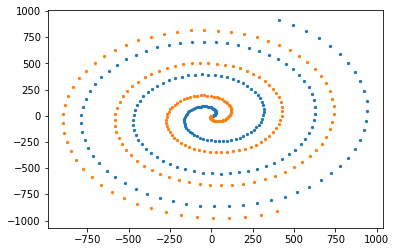

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_95912/2939864048.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


0    201
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [61]:
from sklearn.model_selection import train_test_split

X=df.drop('CLASS', axis = 1)
y=df['CLASS']

# Normalise
X = tf.keras.utils.normalize(X, axis=1)

# Adding features
X['Xsq'] = X['X']**2
X['Ysq'] = X['Y']**2
X['XY'] = X['X']*X['Y']
X['Xsin'] = np.sin(X['X'])
X['Ysin'] = np.sin(X['Y'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [62]:
inputs = layers.Input(shape = (len(X_train.columns),))
layer2 = layers.Dense(8, activation='relu')(inputs)
layer3 = layers.Dense(8, activation='relu')(layer2)
layer4 = layers.Dense(8, activation='relu')(layer3)
outputs = layers.Dense(2, activation='softmax')(layer4)

In [63]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_55 (Dense)            (None, 8)                 64        
                                                                 
 dense_56 (Dense)            (None, 8)                 72        
                                                                 
 dense_57 (Dense)            (None, 8)                 72        
                                                                 
 dense_58 (Dense)            (None, 2)                 18        
                                                                 
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [64]:
# model = keras.Sequential()
# model.add(layers.Dense(8, activation='relu'))
# model.add(layers.Dense(8, activation='relu'))
# model.add(layers.Dense(8, activation='relu'))
# model.add(layers.Dense(2, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.03)

model.compile(optimizer=opt,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

model.fit(X_train, y_train, epochs = 150)

Epoch 1/150
7/7 [==============================] - 0s 11ms/step - loss: 0.6910 - accuracy: 0.5700
Epoch 2/150
1/7 [===>..........................] - ETA: 0s - loss: 0.6826 - accuracy: 0.6250

2022-04-13 16:33:49.216984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 6ms/step - loss: 0.6818 - accuracy: 0.5450
Epoch 3/150
7/7 [==============================] - 0s 6ms/step - loss: 0.6740 - accuracy: 0.5650
Epoch 4/150
7/7 [==============================] - 0s 5ms/step - loss: 0.6650 - accuracy: 0.5850
Epoch 5/150
7/7 [==============================] - 0s 6ms/step - loss: 0.6625 - accuracy: 0.5700
Epoch 6/150
7/7 [==============================] - 0s 6ms/step - loss: 0.6550 - accuracy: 0.5950
Epoch 7/150
7/7 [==============================] - 0s 6ms/step - loss: 0.6652 - accuracy: 0.5600
Epoch 8/150
7/7 [==============================] - 0s 6ms/step - loss: 0.6663 - accuracy: 0.5950
Epoch 9/150
7/7 [==============================] - 0s 5ms/step - loss: 0.6591 - accuracy: 0.5950
Epoch 10/150
7/7 [==============================] - 0s 5ms/step - loss: 0.6615 - accuracy: 0.5850
Epoch 11/150
7/7 [==============================] - 0s 5ms/step - loss: 0.6537 - accuracy: 0.5800
Epoch 12/150
7/7 [======================